# Finding the Two Best Markets to Advertise in an E-learning Product

In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

# Understand the data
To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a [a popular Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, we'll do a quick exploration of the `2017-fCC-New-Coders-Survey-Data.csv` file stored in the clean-data folder of the repository we just mentioned. We'll read in the file using the direct link [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

In [1]:
import pandas as pd

link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(link, low_memory=0)
# Low memory = False to silience data type warning

# The data shape 
print(fcc.shape)
pd.options.display.max_columns = 150 # Avoid truncated output
fcc.head(5)

(18175, 136)


Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN                   NaN           NaN               NaN   
1                   NaN                   NaN           NaN               NaN   
2                   NaN                   NaN           NaN               NaN   
3                   NaN                   NaN           NaN               NaN   
4                   NaN                   NaN           NaN               NaN   

   CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  \
0               NaN                  NaN              NaN   
1               NaN                  NaN              NaN   
2               NaN                  1.0              NaN   
3               NaN                  NaN              NaN   
4               NaN                  NaN              NaN   

   CodeEventNodeSchool  CodeEventNone CodeEventOther  CodeEventRailsBridge  \
0                  NaN            NaN            NaN                   NaN   
1                  NaN            NaN            NaN                   NaN   
2                  1.0            NaN            NaN                   NaN   
3                  NaN            NaN            NaN                   NaN   
4                  NaN            NaN            NaN                   NaN   

   CodeEventRailsGirls  CodeEventStartUpWknd  CodeEventWkdBootcamps  \
0                  NaN                   NaN                    NaN   
1                  NaN                   NaN                    NaN   
2                  NaN                   NaN                    NaN   
3                  NaN                   NaN                    NaN   
4                  NaN                   NaN                    NaN   

   CodeEventWomenCode  CodeEventWorkshops       CommuteTime  \
0                 NaN                 NaN  15 to 29 minutes   
1                 NaN                 NaN               NaN   
2                 NaN                 NaN  15 to 29 minutes   
3                 NaN                 NaN  I work from home   
4                 NaN                 NaN               NaN   

             CountryCitizen               CountryLive  \
0                    Canada                    Canada   
1  United States of America  United States of America   
2  United States of America  United States of America   
3                    Brazil                    Brazil   
4                  Portugal                  Portugal   

               EmploymentField EmploymentFieldOther  \
0  software development and IT                  NaN   
1                          NaN                  NaN   
2  software development and IT                  NaN   
3  software development and IT                  NaN   
4                          NaN                  NaN   

                   EmploymentStatus EmploymentStatusOther  ExpectedEarning  \
0                Employed for wages                   NaN              NaN   
1  Not working but looking for work                   NaN          35000.0   
2                Employed for wages                   NaN          70000.0   

In [2]:
# Check all data columns
fcc.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

# Check for Sample Representativity

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
* Where are these new coders located
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [3]:
# Frequency distribution table for 'JobRoleInterest'
fcc['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                                  2.030892
  Mobile Developer                  

The information in the table above shows:
* A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
* A few people are interested in mobile development.
* A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:
- Split each string in the `JobRoleInterest` column to find the number of options for each participant.
    - We'll first drop the null values because we can't split Nan values.
- Generate a frequency table for the variable describing the number of options.

In [4]:
# Get not null values in 'JobRoleInterest' table
interests_not_null = fcc['JobRoleInterest'].dropna()
# Split each string by comma
splitted_interests = interests_not_null.str.split(',')
splitted_interests

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

In [5]:
# Frequency table for describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [6]:
# Frequency table
web_or_mobile = interests_not_null.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize=True) * 100
freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

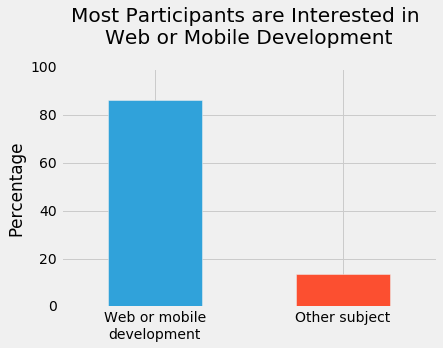

In [7]:
# Graph for frequency table
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage')
plt.xticks([0, 1], 
           ['Web or mobile\ndevelopment', 'Other subject'],
           rotation=0
          )
plt.ylim([0, 100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

# New Coders - Locations and Densitites

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the `CountryLive` variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [8]:
# Isolate the respondents who answered what role they 
# are interested in 
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()
fcc_good

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
1      34.0               0.0             NaN                NaN   
2      21.0               0.0             NaN                NaN   
3      26.0               0.0             NaN                NaN   
4      20.0               0.0             NaN                NaN   
6      29.0               0.0             NaN                NaN   
9      24.0               0.0             NaN                NaN   
11     22.0               0.0             NaN                NaN   
13     44.0               0.0             NaN                NaN   
14     27.0               1.0             1.0                0.0   
15     32.0               0.0             NaN                NaN   
16     29.0               0.0             NaN                NaN   
18     46.0               0.0             NaN                NaN   
19     31.0               0.0             NaN                NaN   
21     23.0               0.0             NaN                NaN   
22     27.0               0.0             NaN                NaN   
23     27.0               0.0             NaN                NaN   
28     19.0               0.0             NaN                NaN   
29     27.0               0.0             NaN                NaN   
30     29.0               0.0             NaN                NaN   
31     27.0               0.0             NaN                NaN   
32     54.0               0.0             NaN                NaN   
33     24.0               0.0             NaN                NaN   
34     30.0               0.0             NaN                NaN   
35     23.0               0.0             NaN                NaN   
37     37.0               0.0             NaN                NaN   
40     30.0               0.0             NaN                NaN   
41     18.0               0.0             NaN                NaN   
42     30.0               0.0             NaN                NaN   
43     19.0               0.0             NaN                NaN   
52     21.0               0.0             NaN                NaN   
...     ...               ...             ...                ...   
18080  28.0               0.0             NaN                NaN   
18081  27.0               0.0             NaN                NaN   
18088  34.0               0.0             NaN                NaN   
18089  29.0               0.0             NaN                NaN   
18090  39.0               0.0             NaN                NaN   
18093  29.0               1.0             0.0                0.0   
18097  27.0               0.0             NaN                NaN   
18098  26.0               0.0             NaN                NaN   
18099  44.0               0.0             NaN                NaN   
18107  35.0               0.0             NaN                NaN   
18111  30.0               0.0             NaN                NaN   
18112  35.0               0.0             NaN                NaN   
18113  24.0               0.0             NaN                NaN   
18118  36.0               0.0             NaN                NaN   
18125  34.0               0.0             NaN                NaN   
18129  55.0               0.0             NaN                NaN   
18130  23.0               0.0             NaN                NaN   
18131  32.0               0.0             NaN                NaN   
18151  38.0               0.0             NaN                NaN   
18153  27.0               0.0             NaN                NaN   
18154  26.0               0.0             NaN                NaN   
18155  30.0               0.0             NaN                NaN   
18156  29.0               0.0             NaN                NaN   
18157  32.0               0.0             NaN                NaN   
18160  62.0               0.0             NaN                NaN   
18161  32.0               0.0             NaN                NaN   
18162  26.0               0.0             NaN                NaN

In [9]:
# Frequency table with absolute + relative frequencies
absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize=True) * 100

# Display 2 frequencies in a readable format
pd.DataFrame(data= {'Absolute frequency': absolute_frequencies,
                    'Percentage': relative_frequencies
                   })

Absolute frequency  Percentage
United States of America                     3125   45.700497
India                                         528    7.721556
United Kingdom                                315    4.606610
Canada                                        260    3.802281
Poland                                        131    1.915765
Brazil                                        129    1.886517
Germany                                       125    1.828020
Australia                                     112    1.637906
Russia                                        102    1.491664
Ukraine                                        89    1.301550
Nigeria                                        84    1.228429
Spain                                          77    1.126060
France                                         75    1.096812
Romania                                        71    1.038315
Netherlands (Holland, Europe)                  65    0.950570
Italy                                          62    0.906698
Serbia                                         52    0.760456
Philippines                                    52    0.760456
Greece                                         46    0.672711
Ireland                                        43    0.628839
South Africa                                   39    0.570342
Mexico                                         37    0.541094
Turkey                                         36    0.526470
Hungary                                        34    0.497221
Singapore                                      34    0.497221
New Zealand                                    33    0.482597
Argentina                                      32    0.467973
Croatia                                        32    0.467973
Indonesia                                      31    0.453349
Norway                                         31    0.453349
...                                           ...         ...
Cameroon                                        1    0.014624
Anguilla                                        1    0.014624
Cuba                                            1    0.014624
Qatar                                           1    0.014624
Somalia                                         1    0.014624
Bolivia                                         1    0.014624
Papua New Guinea                                1    0.014624
Vanuatu                                         1    0.014624
Guatemala                                       1    0.014624
Aruba                                           1    0.014624
Guadeloupe                                      1    0.014624
Turkmenistan                                    1    0.014624
Trinidad & Tobago                               1    0.014624
Yemen                                           1    0.014624
Gibraltar                                       1    0.014624
Rwanda                                          1    0.014624
Sudan                                           1    0.014624
Botswana                                        1    0.014624
Gambia                                          1    0.014624
Mozambique                                      1    0.014624
Nambia                                          1    0.014624
Myanmar                                         1    0.014624
Cayman Islands                                  1    0.014624
Kyrgyzstan                                      1    0.014624
Samoa                                           1    0.014624
Nicaragua                                       1    0.014624
Liberia                                         1    0.014624
Channel Islands                                 1    0.014624
Angola                                          1    0.014624
Jordan                                          1    0.014624

[137 rows x 2 columns]

45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

# Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

* These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the `MonthsProgramming` column.

In [10]:
# Replace 0s with 1s to avoid dividing by 0s
fcc_good['MonthsProgramming'].replace(0, 1, inplace=True)

# New column for the amount of money each student
# spends each month
fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

675

There are 675 coders that have no information about the spend each month. We consider as `0`. Let's keep only the rows that don't have null values for the money_per_month column.

In [11]:
# Keep only the rows that dont have null values in 
# `money_per_month` column
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]
fcc_good['money_per_month'].value_counts()

0.000000        3092
50.000000        128
25.000000        120
16.666667        118
100.000000       118
33.333333        109
8.333333         105
20.000000         88
10.000000         83
83.333333         80
166.666667        67
12.500000         66
4.166667          65
5.000000          62
200.000000        53
500.000000        50
66.666667         47
41.666667         46
250.000000        44
1000.000000       43
3.333333          38
20.833333         37
125.000000        36
6.666667          35
2.500000          33
333.333333        31
5.555556          31
150.000000        31
11.111111         31
30.000000         28
                ... 
6.187500           1
121.428571         1
0.222222           1
1566.666667        1
2.714286           1
4.615385           1
2.692308           1
3500.000000        1
0.103448           1
1066.666667        1
71.000000          1
52.500000          1
137.500000         1
87.500000          1
1228.571429        1
40000.000000       1
56.333333    

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the CountryLive column, and check out if we still have enough data for the four countries that interest us.

In [12]:
# Remove the rows with the null values in `CountryLive`
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Frequency table to check if there is enough data
fcc_good['CountryLive'].value_counts().head(5)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough, so let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [13]:
# Mean sum of the money spent by students each month
country_means = fcc_good.groupby('CountryLive').mean()
country_means

Age  AttendedBootcamp  BootcampFinish  \
CountryLive                                                             
Afghanistan               18.750000          0.000000             NaN   
Albania                   20.666667          0.000000             NaN   
Algeria                   23.750000          0.000000             NaN   
Angola                    20.000000          0.000000             NaN   
Anguilla                  25.000000               NaN             NaN   
Argentina                 26.466667          0.000000             NaN   
Australia                 28.465347          0.068627        0.142857   
Austria                   26.500000          0.062500        0.000000   
Azerbaijan                27.666667          0.000000             NaN   
Bahrain                   14.000000          0.000000             NaN   
Bangladesh                24.277778          0.000000             NaN   
Belarus                   25.333333          0.000000             NaN   
Belgium                   27.705882          0.000000             NaN   
Bosnia & Herzegovina      26.050000          0.050000        1.000000   
Botswana                  23.000000          0.000000             NaN   
Brazil                    24.783784          0.000000             NaN   
Bulgaria                  25.357143          0.000000             NaN   
Cambodia                  22.000000          0.000000             NaN   
Cameroon                  21.000000          0.000000             NaN   
Canada                    26.924686          0.037657        0.625000   
Cayman Islands            20.000000          0.000000             NaN   
Channel Islands                 NaN          0.000000             NaN   
Chile                     24.200000          0.000000             NaN   
China                     25.600000          0.000000             NaN   
Colombia                  23.142857          0.000000             NaN   
Costa Rica                22.833333          0.000000             NaN   
Croatia                   28.692308          0.000000             NaN   
Cuba                      26.000000          0.000000             NaN   
Cyprus                    36.000000          0.000000             NaN   
Czech Republic            23.615385          0.000000             NaN   
...                             ...               ...             ...   
Senegal                   34.500000          0.000000             NaN   
Serbia                    28.113636          0.000000             NaN   
Singapore                 24.793103          0.034483        0.000000   
Slovakia                  24.428571          0.000000             NaN   
Slovenia                  27.666667          0.000000             NaN   
Somalia                   34.000000          0.000000             NaN   
South Africa              27.944444          0.027778        0.000000   
Spain                     28.200000          0.106061        0.428571   
Sri Lanka                 24.000000          0.125000        0.000000   
Sweden                    25.370370          0.000000             NaN   
Switzerland               29.214286          0.000000             NaN   
Taiwan                    31.166667          0.166667        0.500000   
Thailand                  23.900000          0.000000             NaN   
Trinidad & Tobago         37.000000          0.000000             NaN   
Tunisia                   21.000000          0.200000        1.000000   
Turkey                    24.612903          0.000000             NaN   
Turkmenistan              17.000000          0.000000             NaN   
Uganda                    26.666667          0.000000             NaN   
Ukraine                   25.797468          0.038462        0.000000   
United Arab Emirates      25.062500          0.000000             NaN   
United Kingdom            28.620939          0.025090        0.714286   
United States of America  29.382282          0.081877        0.529661   
Uruguay          

In [14]:
country_means['money_per_month'][['United States of America',
                                  'India', 
                                  'United Kingdom',
                                  'Canada'
                                 ]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

# Dealing with Extreme Outliers

Let's use box plots to visualize the distribution of the `money_per_month` variable for each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


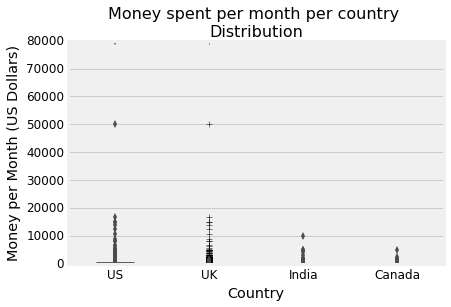

In [15]:
usa_money_per_month = fcc_good[fcc_good['CountryLive'] == 'United States of America']['money_per_month']
type(usa_money_per_month)
usa_money_per_month.plot.box()

# Isolate only 4 countriies
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
only_4

# Box plots to visualize the distribution
import seaborn as sns

sns.boxplot(x='CountryLive', 
            y='money_per_month', 
            data=only_4)
plt.title('Money spent per month per country \nDistribution',
          fontsize=16
         )
plt.xlabel('Country')
plt.ylabel('Money per Month (US Dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [16]:
# Isolate only the participants who spend less than 20000 per month
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

Now let's recompute the mean values and plot the box plots again.

In [17]:
countries_means = fcc_good.groupby('CountryLive').mean()
countries_means['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


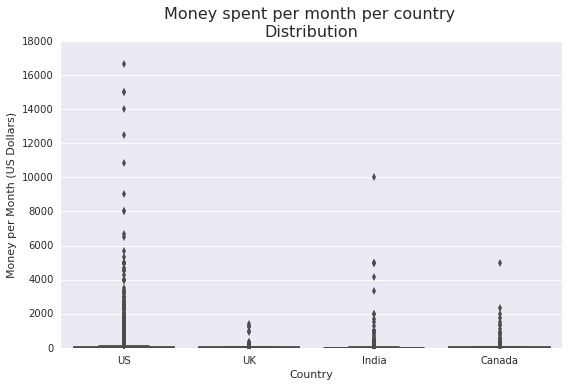

In [18]:
# Isolate again the countries of our interests
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Box plot to visualise the distributions
sns.boxplot(x='CountryLive', y='money_per_month', data=only_4)
plt.title('Money spent per month per country \nDistribution',
          fontsize=16
         )
plt.xlabel('Country')
plt.ylabel('Money per Month (US Dollars)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [19]:
# Inspect the extreme outliers for India
india_outliers = fcc_good[(fcc_good['CountryLive'] == 'India')
                          & (fcc_good['money_per_month'] >= 2500)
                         ]
india_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more than 1 million   
15587                NaN             NaN            more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
1728                    NaN                   NaN           NaN   
1755                    NaN                   NaN           1.0   
7989                    1.0                   NaN           NaN   
8126                    NaN                   NaN           NaN   
13398                   NaN                   NaN           NaN   
15587                   NaN                   NaN           NaN   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
1728                1.0               NaN                  NaN   
1755                NaN               NaN                  1.0   
7989                NaN               NaN                  NaN   
8126                1.0               NaN                  1.0   
13398               NaN               NaN                  NaN   
15587               NaN               NaN                  1.0   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
1728               NaN                  NaN            NaN            NaN   
1755               1.0                  NaN            NaN            NaN   
7989               NaN                  NaN            NaN            NaN   
8126               NaN                  NaN            NaN            NaN   
13398              NaN                  NaN            1.0            NaN   
15587              NaN                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
1728                    NaN                  NaN                   NaN   
1755                    NaN                  NaN                   NaN   
7989                    NaN                  NaN                   NaN   
8126                    NaN                  NaN                   NaN   
13398                   NaN                  NaN                   NaN   
15587                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
1728                     NaN                 NaN                 NaN   
1755                     NaN                 NaN                 NaN   
7989                     NaN                 NaN                 1.0   
8126                     NaN                 NaN                 NaN   
13398                    NaN                 NaN                 NaN   
15587                    NaN                 NaN                 NaN   

            CommuteTime CountryCitizen CountryLive  \
1728                NaN          India       India   
1755                NaN          India       India   
7989   15 to 29 minutes          India       India   
8126                NaN          India       India   
13398               NaN          India       India   
15587  15 to 29 minutes          India       India   

                   EmploymentField Emp

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was _"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"_, so they might have misunderstood and thought university tuition is included. It seems safer to remove these rows.

In [20]:
# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [21]:
# Examine extreme outliers from the US
usa_outliers = fcc_good[(fcc_good['CountryLive'] == 'United States of America')
                        & (fcc_good['money_per_month'] >= 6000)
                       ]
usa_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard                1.0   
3184                           We Can Code IT                1.0   
3930                                      NaN                NaN   
6805                                 Sabio.la                0.0   
7198                                      NaN                NaN   
7505                                   Codeup                0.0   
9778                             Grand Circus                1.0   
16650                                     NaN                NaN   
16997                                     NaN                NaN   
17231                                     NaN                NaN   

       ChildrenNumber                 CityPopulation  CodeEventConferences  \
718               NaN            more than 1 million                   1.0   
1222              NaN  between 100,000 and 1 million                   NaN   
3184              NaN            more than 1 million                   NaN   
3930              NaN  between 100,000 and 1 million                   NaN   
6805              NaN  between 100,000 and 1 million                   NaN   
7198              NaN            more than 1 million                   1.0   
7505              NaN            more than 1 million                   NaN   
9778              NaN  between 100,000 and 1 million                   NaN   
16650             2.0            more than 1 million                   NaN   
16997             1.0            more than 1 million                   NaN   
17231             2.0              less than 100,000                   NaN   

       CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  \
718                     NaN           NaN               NaN               NaN   
1222                    NaN           NaN               NaN               NaN   
3184                    NaN           NaN               NaN               NaN   
3930                    NaN           NaN               NaN               NaN   
6805                    NaN           NaN               NaN               NaN   
7198                    NaN           NaN               NaN               NaN   
7505                    NaN           NaN               NaN               NaN   
9778                    NaN           NaN               NaN               NaN   
16650                   NaN           NaN               NaN               NaN   
16997                   NaN           NaN               NaN               NaN   
17231                   NaN           NaN               NaN               NaN   

       CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  \
718                    NaN              NaN                  NaN   
1222                   NaN              1.0                  NaN   
3184                   NaN              1.0                  NaN   
3930                   NaN              NaN                  NaN   
6805                   NaN              NaN                  NaN   
7198                   NaN              1.0             

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:
- Did not attend the Bootcamp
- Had been programming for three months or less when at the time they completed the survey


In [22]:
# Remove the respondents who didnot attend the bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)

# Remove the respondest who had been programming for
# 3 months or less
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.

In [23]:
# Examine extreme outliers for Canada
outliers_canada = fcc_good[
    (fcc_good['CountryLive'] == 'Canada') &
    (fcc_good['money_per_month'] >= 4500)
]
outliers_canada['MonthsProgramming']

13659    2.0
Name: MonthsProgramming, dtype: float64

Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [24]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(outliers_canada.index)

Let's recompute the mean values and generate the final box plots.

In [26]:
# Recompute mean of money per month each student spends
# by country
only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

In [ ]:
# Visualize the distributions again
sns